In [248]:
import pandas as pd
import json
import os
import requests
from datetime import datetime, timezone
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import statsmodels.api as sms
from tensorflow.keras.layers import Dropout

In [249]:
!pip install pmdarima

In [250]:
url = "https://merolagani.com/handlers/TechnicalChartHandler.ashx?type=get_advanced_chart&symbol=NTC&resolution=1D&rangeStartDate=1642411546&rangeEndDate=1770545453&from=&isAdjust=1&currencyCode=NPR"
response = requests.get(url)
data = response.json()


with open("ntc.json", "w") as f:
    json.dump(data, f)

In [251]:
companies = ["/content/ntc.json"]

for symbol in companies:
    with open(f"{symbol}", 'r') as f:
        data = json.load(f)
        print(data)
    dates = [datetime.fromtimestamp(ts, tz=timezone.utc).strftime('%Y-%m-%d') for ts in data['t']]
    df=pd.DataFrame({
    "Date":dates,
    "Open":data['o'],
    "Close":data['c'],
    "High":data['h'],
    "Low":data['l'],
    "Volume":data['v']

})
    csv_filename = os.path.basename(symbol).replace('.json', '.csv')
    print(csv_filename)
    df.to_csv(csv_filename,index=False)
    print(f"{csv_filename}created")

{'t': [1642452300, 1642538700, 1642625100, 1642711500, 1642970700, 1643057100, 1643143500, 1643229900, 1643316300, 1643575500, 1643661900, 1643748300, 1643921100, 1644180300, 1644266700, 1644353100, 1644439500, 1644525900, 1644785100, 1644871500, 1644957900, 1645044300, 1645130700, 1645389900, 1645476300, 1645562700, 1645649100, 1645735500, 1645994700, 1646081100, 1646253900, 1646599500, 1646685900, 1646858700, 1646945100, 1647204300, 1647290700, 1647377100, 1647463500, 1647809100, 1647895500, 1647981900, 1648068300, 1648154700, 1648413900, 1648500300, 1648586700, 1648673100, 1648759500, 1649018700, 1649105100, 1649191500, 1649277900, 1649364300, 1649709900, 1649796300, 1649882700, 1650228300, 1650314700, 1650401100, 1650487500, 1650573900, 1650833100, 1650919500, 1651005900, 1651092300, 1651178700, 1651524300, 1651697100, 1651783500, 1652042700, 1652129100, 1652215500, 1652301900, 1652388300, 1652820300, 1652906700, 1652993100, 1653079500, 1653338700, 1653425100, 1653511500, 165359790

In [252]:
df = pd.read_csv("ntc.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
print(len(df))

942


In [253]:
df.head()

,Open,Close,High,Low,Volume
Date,,,,,
2022-01-17,1219.75,1215.00,1228.33,1180.00,165102.0
2022-01-18,1239.17,1249.17,1288.33,1210.00,169325.0
2022-01-19,1224.25,1213.33,1291.67,1210.17,84219.0
2022-01-20,1196.67,1214.17,1253.58,1193.33,107068.0
2022-01-23,1238.33,1260.83,1270.83,1225.00,213430.0


In [254]:
df.tail()

,Open,Close,High,Low,Volume
Date,,,,,
2026-02-02,850.0,850.0,860.0,850.0,16347.0
2026-02-03,851.0,850.9,860.0,847.0,9721.0
2026-02-04,834.0,852.9,865.0,834.0,10761.0
2026-02-05,850.0,853.0,860.0,850.0,8449.0
2026-02-08,855.0,850.0,860.0,848.0,17064.0


In [255]:
type(df)

pandas.core.frame.DataFrame

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2022-01-17 to 2026-02-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    942 non-null    float64
 1   Close   942 non-null    float64
 2   High    942 non-null    float64
 3   Low     942 non-null    float64
 4   Volume  942 non-null    float64
dtypes: float64(5)
memory usage: 44.2 KB


<Axes: xlabel='Date'>

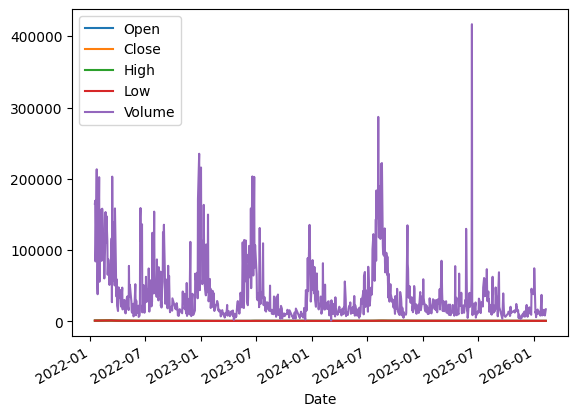

In [257]:
df.plot()

In [258]:
def plot_graph(figsize, df_to_plot, column_name):

    plt.figure(figsize=figsize)
    plt.plot(df_to_plot.index, df_to_plot[column_name], label=column_name)
    plt.title(f"SAHAS {column_name} Over Time")
    plt.xlabel("Date")
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

In [259]:
type(df['Close'])

pandas.core.series.Series

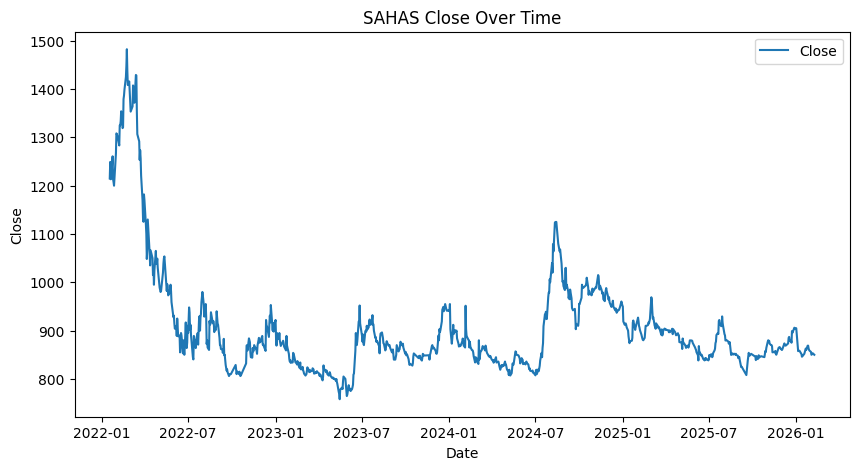

In [260]:
import matplotlib.pyplot as plt
plot_graph((10, 5), df, "Close")

##DICKEY FULLER TEST

In [261]:
from statsmodels.tsa.stattools import adfuller

In [262]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('The series is stationary.')
    else:
        print('The series is not stationary.')

In [263]:
adf_test(df['Close'])

ADF Statistic: -2.9789448797642977
p-value: 0.03690801844728795
The series is stationary.


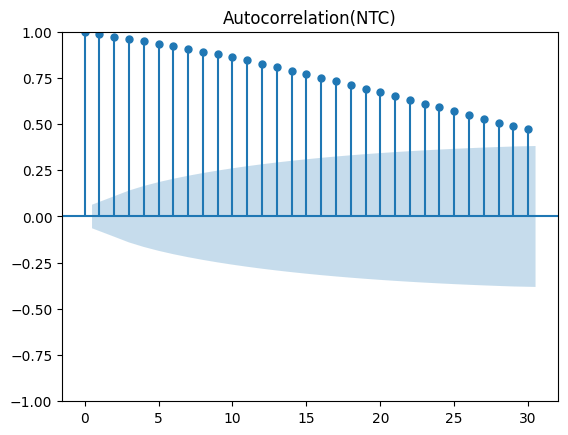

In [264]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df['Close'])
plt.title("Autocorrelation(NTC)")
plt.show()

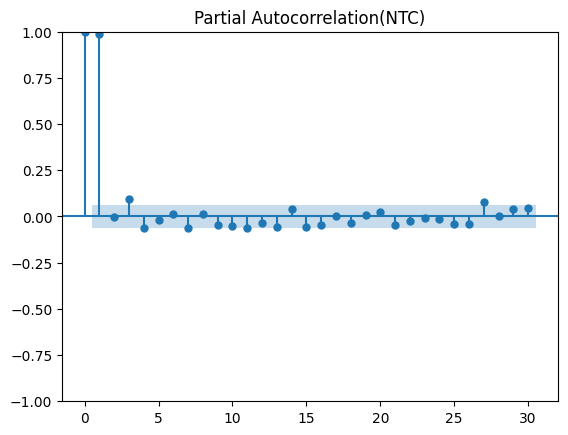

In [265]:
pacf = plot_pacf(df['Close'])
plt.title("Partial Autocorrelation(NTC)")
plt.show()

In [266]:
#using differencing
df['Close_first_difference'] = df['Close']-df['Close'].shift(1)

In [267]:
df.head()

,Open,Close,High,Low,Volume,Close_first_difference
Date,,,,,,
2022-01-17,1219.75,1215.00,1228.33,1180.00,165102.0,NaN
2022-01-18,1239.17,1249.17,1288.33,1210.00,169325.0,34.17
2022-01-19,1224.25,1213.33,1291.67,1210.17,84219.0,-35.84
2022-01-20,1196.67,1214.17,1253.58,1193.33,107068.0,0.84
2022-01-23,1238.33,1260.83,1270.83,1225.00,213430.0,46.66


In [268]:
data=df['Close_first_difference'].dropna()
adf_test(data)

ADF Statistic: -17.817858692186594
p-value: 3.1698640603842414e-30
The series is stationary.


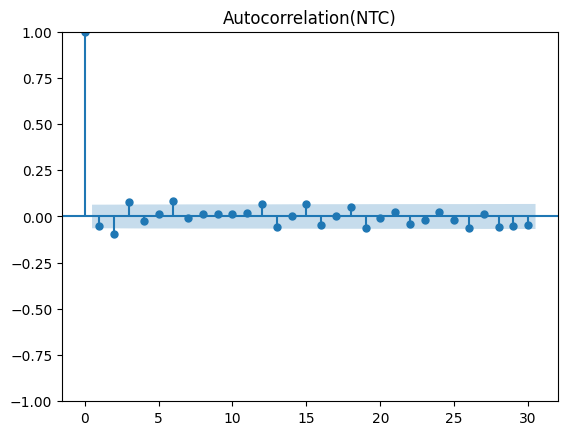

In [269]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(data)
plt.title("Autocorrelation(NTC)")
plt.show()

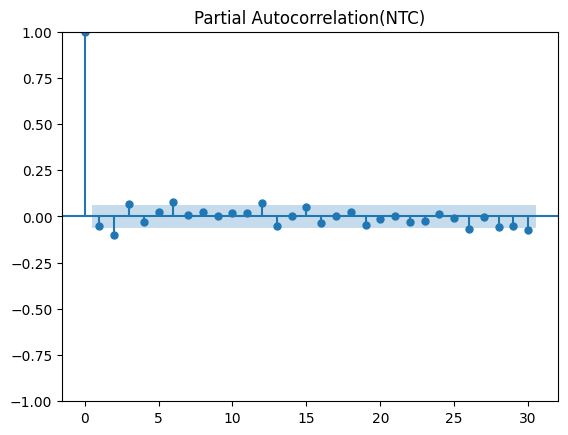

In [270]:
result = plot_pacf(data)
plt.title("Partial Autocorrelation(NTC)")
plt.show()

<Axes: xlabel='Date'>

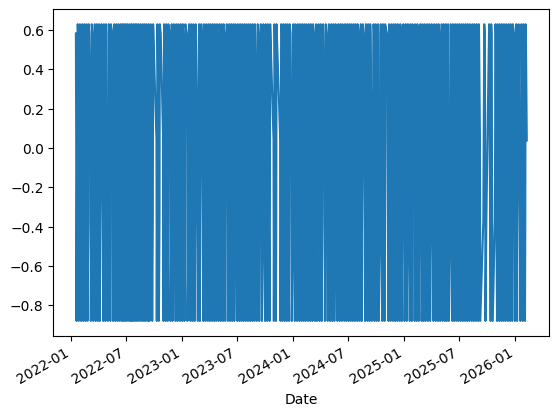

In [271]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result=seasonal_decompose(df['Close'],period=5)
decompose_result.seasonal.plot()

In [272]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
close=df['Close']
res = ARIMA(close, order=(0,1,0)).fit()
acorr_ljungbox(res.resid, lags=[10,15,20], return_df=True)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



,lb_stat,lb_pvalue
10,6.130415,0.804190
15,7.481669,0.942881
20,9.619127,0.974564


In [273]:
to_row=int(len(df)*0.8)
training_data = list(df['Close'].iloc[0:to_row])
testing_data  = list(df['Close'].iloc[to_row:])

In [274]:
testing_data

[896.64,
 900.34,
 896.73,
 899.84,
 903.95,
 892.68,
 902.74,
 898.67,
 896.99,
 893.38,
 890.39,
 891.37,
 894.57,
 890.01,
 890.05,
 876.13,
 875.81,
 873.71,
 862.04,
 883.69,
 876.14,
 871.84,
 868.18,
 864.23,
 868.19,
 869.09,
 869.09,
 864.85,
 869.4,
 873.04,
 879.77,
 879.71,
 879.45,
 878.94,
 874.75,
 865.14,
 862.32,
 860.4,
 855.37,
 849.24,
 838.29,
 867.97,
 853.97,
 854.96,
 848.46,
 849.96,
 847.09,
 844.6,
 841.64,
 838.36,
 842.62,
 840.52,
 843.11,
 839.88,
 840.48,
 838.34,
 840.13,
 849.64,
 846.03,
 851.24,
 848.77,
 845.03,
 846.55,
 853.3,
 858.96,
 862.55,
 874.18,
 877.27,
 890.89,
 895.16,
 893.08,
 919.94,
 922.0,
 915.0,
 909.17,
 909.64,
 929.41,
 916.16,
 909.61,
 892.57,
 890.26,
 879.54,
 880.16,
 880.49,
 877.37,
 872.99,
 874.58,
 876.08,
 849.61,
 851.52,
 852.81,
 852.79,
 850.4,
 852.12,
 850.91,
 850.34,
 852.06,
 849.32,
 848.27,
 843.03,
 844.1,
 845.66,
 839.51,
 824.74,
 825.52,
 808.0,
 838.6,
 854.0,
 849.0,
 848.2,
 852.0,
 846.0,
 839.0,

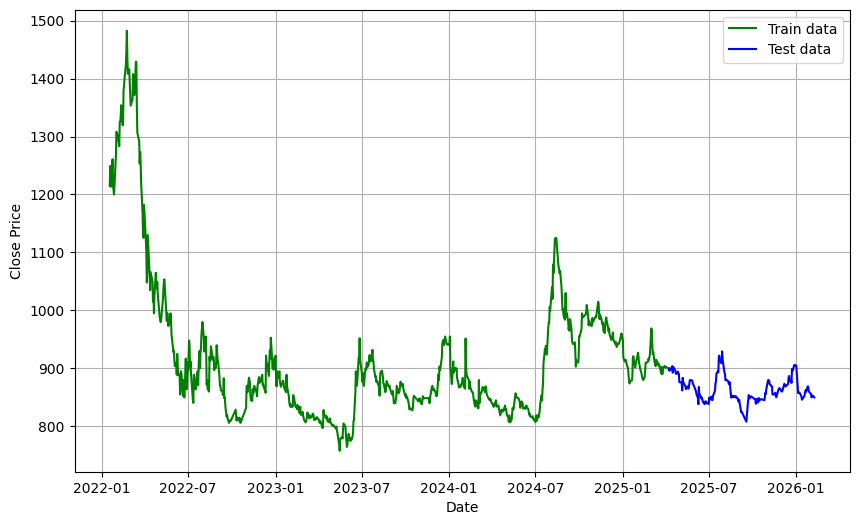

In [275]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df[0:to_row]['Close'],'green',label='Train data')
plt.plot(df[to_row:]['Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [276]:
model_predictions=[]
n_test_obser = len(testing_data)

In [277]:
from statsmodels.tsa.arima.model import ARIMA
model_predictions = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
    model = ARIMA(training_data, order=(1,0,0))
    model_fit = model.fit()

    output = model_fit.forecast(steps=1)
    yhat = output[0]

    model_predictions.append(yhat)
    training_data.append(testing_data[i])

In [278]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  941
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3964.190
Date:                Tue, 10 Feb 2026   AIC                           7934.380
Time:                        07:18:10   BIC                           7948.921
Sample:                             0   HQIC                          7939.923
                                - 941                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        907.0860     63.504     14.284      0.000     782.620    1031.552
ar.L1          0.9921      0.003    325.221      0.000       0.986       0.998
sigma2       265.9196      7.240     36.731      0.0

In [279]:
print(type(model_predictions))
print(np.array(model_predictions).shape)
print(model_predictions)

<class 'list'>
(189,)
[np.float64(900.4879788760389), np.float64(896.8079103744877), np.float64(900.4781158740421), np.float64(896.8973681183794), np.float64(899.9817195269608), np.float64(904.0579122475955), np.float64(892.8797767692831), np.float64(902.8574633781698), np.float64(898.8205368052427), np.float64(897.1539952578028), np.float64(893.5731301436889), np.float64(890.6071046981307), np.float64(891.5787893200284), np.float64(894.7524575880288), np.float64(890.2291940697133), np.float64(890.268503843408), np.float64(876.4605527859001), np.float64(876.1425300558051), np.float64(874.0587227728528), np.float64(862.480775479672), np.float64(883.9582118093037), np.float64(876.4685883944439), np.float64(872.2024172461316), np.float64(868.5709034697109), np.float64(864.6514737266064), np.float64(868.5794224338367), np.float64(869.471588391681), np.float64(869.4709074992901), np.float64(865.2637844524093), np.float64(869.7771130438747), np.float64(873.3875605643735), np.float64(880.0632

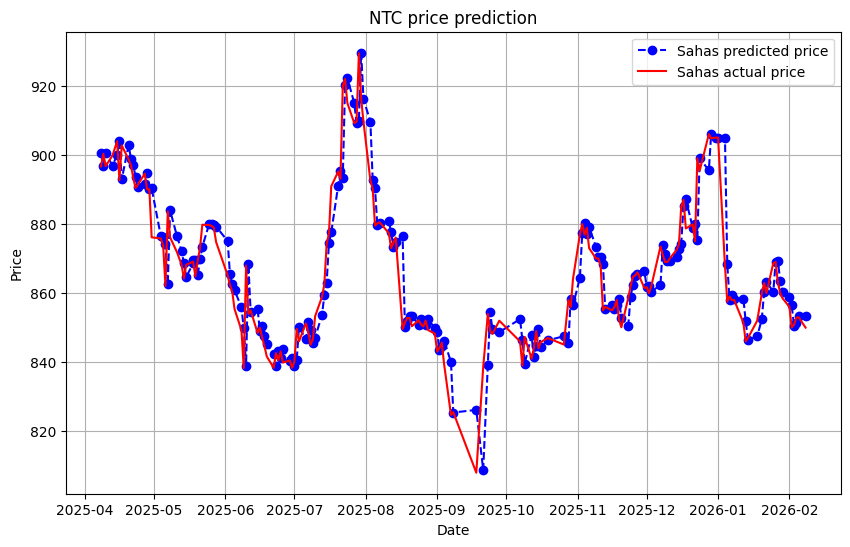

In [280]:
plt.figure(figsize=(10,6))
plt.grid(True)

date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color='blue',marker='o',linestyle='dashed',label='Sahas predicted price')
plt.plot(date_range, testing_data,color='red',label='Sahas actual price')

plt.title('NTC price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [281]:

mape= np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.array(testing_data))
print('Mape:'+str(mape))

Mape:0.0059554539715123275


In [282]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(testing_data, model_predictions))
print("RMSE from arima for NTC:", rmse)
mae = mean_absolute_error(testing_data,model_predictions)
print("MAE from arima for NTC:", mae)

RMSE from arima for NTC: 7.920188690407224
MAE from arima for NTC: 5.168300140507112


In [283]:
# Import libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go


final_model = ARIMA(df['Close'], order=(1,0,0))
final_model_fit = final_model.fit()

# --- Forecast next 5 days with confidence intervals ---
forecast = final_model_fit.get_forecast(steps=1)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()



# --- Create future dates starting after last date in df ---
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')

# --- Interactive plot with plotly ---
fig = go.Figure()

# Historical data
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    name='Historical'
))

# Forecast
fig.add_trace(go.Scatter(
    x=future_dates,
    y=mean_forecast.values,
    mode='lines+markers',
    name='Forecast',
    line=dict(color='red', dash='dash')
))

# Confidence interval
fig.add_trace(go.Scatter(
    x=list(future_dates) + list(future_dates[::-1]),
    y=list(conf_int.iloc[:,0]) + list(conf_int.iloc[:,1][::-1]),
    fill='toself',
    fillcolor='rgba(255,182,193,0.3)',  # light pink
    line=dict(color='rgba(255,182,193,0)'),
    hoverinfo="skip",
    showlegend=True,
    name='95% CI'
))

fig.update_layout(
    title='Stock Price Forecast with 95% Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Close Price',
    template='plotly_white'
)

fig.show()

# --- Print next day prediction safely ---
print("Next trading day prediction:", float(mean_forecast.iloc[0]))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

Next trading day prediction: 850.4475543821441


In [284]:
print(forecast)

In [285]:
import pandas as pd
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Suppose df['Close'] has your stock prices
# Example: df = pd.read_csv("NTC.csv", parse_dates=['Date'], index_col='Date')

# --- Step 1: Use auto_arima to find best p,d,q ---
auto_model = pm.auto_arima(
    df['Close'],
    start_p=0, max_p=30,
    start_q=0, max_q=30,
    d=None,               # if None, automatically test for differencing
    seasonal=False,       # change to True if you suspect seasonality
    stepwise=True,        # faster search
    suppress_warnings=True,
    trace=True            # prints search progress
)

print("Best ARIMA order:", auto_model.order)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7929.460, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7929.036, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7928.484, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7927.992, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7928.432, Time=0.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.790 seconds
Best ARIMA order: (0, 1, 0)


In [286]:
import pickle
with open("arima_model_feb_NTC.pkl", "wb") as f:
    pickle.dump(final_model_fit, f)

print("Model saved as arima_model.pkl")

Model saved as arima_model.pkl
